Calcualtes the trajectory of bulks of snow generated aloft on their way to the surface based on radisoundings

In [1]:
import sys
sys.path.append('/home/silke/Python/radarlecture2016/radarmeteorology/common')
import warnings
warnings.filterwarnings('ignore')
from helper import create_filename
import pandas as pd 
import numpy as np
import datetime as dt
from scipy import stats
import wradlib as wrl
from scipy import ndimage
import math
import matplotlib.pyplot as pl
import matplotlib as mpl
try:
    get_ipython().magic("matplotlib inline")
except:
    pl.ion()
import os
import glob
import scipy
from pandas import rolling_median
from scipy import interpolate
from scipy.stats import linregress
import numpy.ma as ma
from numpy import asarray as ar

In [2]:
datepath="/home/silke/Python/output/Riming/"

dates=['2014-08-26','2016-09-04','2014-10-09','2014-07-05',
        '2015-06-22','2015-02-27','2015-01-08','2015-01-02','2014-12-19','2014-11-16','2014-10-15',
        '2013-04-12','2013-07-03','2014-05-06','2014-05-27','2014-06-28','2014-07-08','2014-07-09','2014-10-07','2014-10-08','2014-11-04','2014-12-12',
       '2015-03-29','2015-04-02','2015-05-03','2015-05-29',
       '2015-06-02', '2015-06-13','2015-06-23', '2015-07-13','2015-08-04','2015-08-08','2015-08-17',
       '2015-08-27','2015-09-01','2015-09-13', 
       '2015-09-16','2015-09-22','2015-10-05','2015-11-06','2015-11-17', '2015-11-19', '2015-11-20',
       '2015-11-29', '2015-12-08','2015-12-09',
       '2015-12-11', '2015-12-16', '2015-12-22', '2015-12-25','2016-01-02','2016-01-07']
print(dates)


['2014-08-26', '2016-09-04', '2014-10-09', '2014-07-05', '2015-06-22', '2015-02-27', '2015-01-08', '2015-01-02', '2014-12-19', '2014-11-16', '2014-10-15', '2013-04-12', '2013-07-03', '2014-05-06', '2014-05-27', '2014-06-28', '2014-07-08', '2014-07-09', '2014-10-07', '2014-10-08', '2014-11-04', '2014-12-12', '2015-03-29', '2015-04-02', '2015-05-03', '2015-05-29', '2015-06-02', '2015-06-13', '2015-06-23', '2015-07-13', '2015-08-04', '2015-08-08', '2015-08-17', '2015-08-27', '2015-09-01', '2015-09-13', '2015-09-16', '2015-09-22', '2015-10-05', '2015-11-06', '2015-11-17', '2015-11-19', '2015-11-20', '2015-11-29', '2015-12-08', '2015-12-09', '2015-12-11', '2015-12-16', '2015-12-22', '2015-12-25', '2016-01-02', '2016-01-07']


2014-08-26
[2310. 2976. 3137. 3529. 3875. 4193. 4498. 4539. 4673. 5149. 5164.]
('dh', array([666., 161., 392., 346., 318., 305.,  41., 134., 476.,   0.]))
x,y,r
(30837.534015552344, -897.3386306663251, 30850.587041066723)
('min,max', 30850.587041066723, 30850.587041066723)
2016-09-04
[3103. 3255. 4178. 4217. 4308. 4321. 4361. 4480. 4588. 4751. 4820. 4876.
 4988. 5016. 5144. 5332. 5539. 5644. 5750. 5765. 5827.]
('dh', array([152., 923.,  39.,  91.,  13.,  40., 119., 108., 163.,  69.,  56.,
       112.,  28., 128., 188., 207., 105., 106.,  15.,   0.]))
x,y,r
(51840.038889078874, 16556.40432437501, 54419.703749408574)
('min,max', 30850.587041066723, 54419.703749408574)
2014-10-09
[1988. 2300. 2537. 2668. 2702. 2984. 3251. 3453. 4429. 4591. 4700. 5122.
 5580. 5610.]
('dh', array([312., 237., 131.,  34., 282., 267., 202., 976., 162., 109., 422.,
       458.,   0.]))
x,y,r
(69154.60466806595, 71303.31839135986, 99330.37078565713)
('min,max', 30850.587041066723, 99330.37078565713)
2014-07-05


('dh', array([ 78., 158., 426.,  94., 200., 469., 860., 291.,   0.]))
x,y,r
(60369.36836916157, 25140.498540016924, 65394.99448835606)
('min,max', 1905.3542608766134, 99330.37078565713)
2015-12-08
[1576. 1730. 1886. 1976. 2055. 2444. 2698. 2752. 2806. 3071. 3127. 3320.
 3494. 3816. 3964. 4063. 4433. 4640.]
('dh', array([154., 156.,  90.,  79., 389., 254.,  54.,  54., 265.,  56., 193.,
       174., 322., 148.,  99., 370.,   0.]))
x,y,r
(27075.050995061476, 39008.586827582076, 47483.97869461014)
('min,max', 1905.3542608766134, 99330.37078565713)
2015-12-09
[1031. 1148. 1313. 1556. 1727. 2397. 2609. 3099. 3457. 4485.]
('dh', array([117., 165., 243., 171., 670., 212., 490., 358.,   0.]))
x,y,r
(27201.352910888898, 10170.949887379471, 29040.692515749488)
('min,max', 1905.3542608766134, 99330.37078565713)
2015-12-11
[ 818.  923. 1183. 1303. 1479. 1498. 2507. 3030. 3222.]
('dh', array([ 105.,  260.,  120.,  176.,   19., 1009.,  523.,    0.]))
x,y,r
(49687.38205184585, 988.4125602131664, 49697

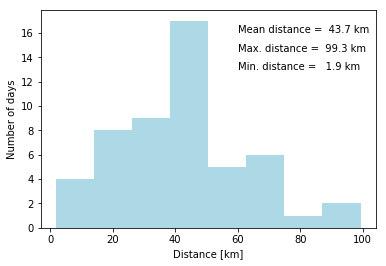

In [12]:
# Read the sounding data
#for k in range(len(dates)):
rfeld=[]
path2="/home/silke/Python/projects/climatology/"
f = open(path2 + 'Trajectories.txt', 'wb')
f.write("%7s %7s %7s %7s %7s %7s" %
              ('Date','x','y','Dist','H','Hoehe\n')) 
for k in range(len(dates)):    
    date=dates[k]
    print(date)
    #terminal velocity of snowflakes in m/s
    vt= 1.0
    filename = os.path.join('/home/silke/Python/radarlecture2016/radarmeteorology/common/radarmet_data/stations', 
                            'radio_'+dates[k]+'.txt')
    radio = np.genfromtxt(filename, skip_header=3, autostrip=True, 
                         invalid_raise=False)
    
    
    
    sheight = radio[:, 1]
    stemp = radio[:, 2]
    vdir = radio[:, 6]
    #velocity in m/s
    vspeed = radio[:, 7]*0.514
    # remove nans
    idx = np.isfinite(vspeed)
    vspeed = vspeed[idx]
    vdir = vdir[idx]
    sheight = sheight[idx]
    stemp = stemp[idx]
       
    mask0 = (stemp <= -15.00) | (stemp >= 4.0)   
    
    #sheight[mask0]=np.nan
    #vdir[mask0]=np.nan
    #vspeed[mask0]=np.nan
    #stemp[mask0]=np.nan
    sheight=sheight[~mask0]
    vdir=vdir[~mask0]
    vspeed=vspeed[~mask0]
    stemp=stemp[~mask0]
    vx=np.zeros_like(vdir)
    vy=np.zeros_like(vdir)

        
    vx=-1*vspeed*np.sin((vdir)*np.pi/180.)
    vy=-1*vspeed*np.cos((vdir)*np.pi/180.)
         
    n=len(vdir)
    dh=np.zeros(n-1)
    print(sheight)
    for i in range(n-2):
        dh[i]=(sheight[i+1]-sheight[i])
    print('dh',dh)
    #x-distance in m
    #y-distance in m
    x=np.sum(vx[0:n-1]*dh/vt)
    y=np.sum(vy[0:n-1]*dh/vt)
    #r Abstand in m
    r=np.sqrt(x**2+y**2)
    rfeld.append(r)
    print('x,y,r')
    print(x,y,r)
    print('min,max',np.min(rfeld),np.max(rfeld))
    f.write("%9s %9.1f %9.1f %9.1f %9.1f \n" %
              (dates[k], x,y,r,sheight[0]))
f.close()

rfeld=np.vstack(rfeld)
rfeld_km = rfeld/1000.
r_ave=np.nanmean(rfeld_km, axis=0)
r_max=np.nanmax(rfeld_km, axis=0)
r_min=np.nanmin(rfeld_km, axis=0)

fig = pl.figure()
pl.hist(rfeld_km, bins='auto', color='lightblue')
pl.annotate(r'Mean distance = %5.1f km' % (r_ave), xy=(60,16),xytext=(60,16))
pl.annotate(r'Max. distance = %5.1f km' % (r_max), xy=(60,14.5),xytext=(60,14.5))
pl.annotate(r'Min. distance = %5.1f km' % (r_min), xy=(60,13),xytext=(60,13))
pl.xlabel(r"Distance [km]")
pl.ylabel(r"Number of days")
fig.savefig('/home/silke/Python/projects/climatology/DistanceAdvected.png')
#pl.plot(nr,SS,'bx')
pl.show()
